>Backpropagating errors to parameters and then updating those parameters by tak- ing the gradient with respect to the loss is the same no matter what the underlying model is.

The `torch.nn` module contains building blocks for building neural networks. 

The building blocks are called "modules" (analogous to "layers" in the literature). The base class is `nn.Module`.

A `nn.Module` can have `Parameter` instances as attributes; they can also have `nn.Module` instances as submodules. These must be top-level data attributes! Otherwise use `nn.ModuleList` or `nn.ModuleDict`.

One popular examples is `nn.Linear`, an affine transformation.

`nn.Module` classes all have `__call__` defined, so we can call them like a function. This computes a forward pass.

In [13]:
import torch

linear_model = torch.nn.Linear(in_features=1, out_features=1)

list(linear_model.named_parameters())

[('weight',
  Parameter containing:
  tensor([[0.0589]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0.3777], requires_grad=True))]

Important! `nn.Module` is designed to take multiple samples at once. The zeroth dimension is the batch dim.

In [16]:
x = torch.ones(size=(10, 1))
x

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [17]:
linear_model(x)

tensor([[0.4366],
        [0.4366],
        [0.4366],
        [0.4366],
        [0.4366],
        [0.4366],
        [0.4366],
        [0.4366],
        [0.4366],
        [0.4366]], grad_fn=<AddmmBackward0>)

In [24]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_c_train, t_u_val = None, t_c_val = None):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        # t_p_val = model(t_u_val)
        # loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")
                #   f" Validation loss {loss_val.item():.4f}")

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_un = 0.1 * t_u

linear_model = torch.nn.Linear(1, 1)
optimizer = torch.optim.SGD(
    linear_model.parameters(),
    lr=1e-2,
)

training_loop(
    n_epochs=3000,
    model=linear_model,
    optimizer=optimizer,
    loss_fn=torch.nn.MSELoss(),
    t_u_train=t_un,
    t_c_train=t_c,
)

print("\n",linear_model.weight,"\n",linear_model.bias)

Epoch 1, Training loss 127.5501
Epoch 1000, Training loss 3.8621
Epoch 2000, Training loss 2.9588
Epoch 3000, Training loss 2.9287

 Parameter containing:
tensor([[5.3485]], requires_grad=True) 
 Parameter containing:
tensor([-17.1960], requires_grad=True)


In [18]:
import torch

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_c_train, t_u_val = None, t_c_val = None):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        # t_p_val = model(t_u_val)
        # loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")
                #   f" Validation loss {loss_val.item():.4f}")


t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_un = 0.1 * t_u

from collections import OrderedDict

seq_model = torch.nn.Sequential(OrderedDict([
                ('hidden_linear', torch.nn.Linear(1, 13)),
                ('hidden_activation', torch.nn.Tanh()),
                ('output_linear', torch.nn.Linear(13, 1)),
                ]))

optimizer = torch.optim.SGD(
    seq_model.parameters(),
    lr=1e-3,
)

training_loop(
    n_epochs=5_000,
    model=seq_model,
    optimizer=optimizer,
    loss_fn=torch.nn.MSELoss(),
    t_u_train=t_un,
    t_c_train=t_c,
)

# print("\n",seq_model.weight,"\n",seq_model.bias)

Epoch 1, Training loss 200.3813
Epoch 1000, Training loss 4.7249
Epoch 2000, Training loss 3.8763
Epoch 3000, Training loss 2.4319
Epoch 4000, Training loss 1.9357
Epoch 5000, Training loss 1.8356


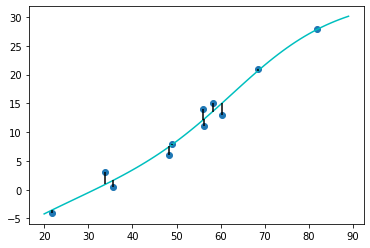

In [19]:
import matplotlib.pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig, ax = plt.subplots()

ax.plot(t_u, t_c, 'o', label='data')
ax.plot(t_range, seq_model( 0.1 * t_range).detach(), 'c-', label='model predictions')
ax.vlines(t_u, t_c, seq_model(0.1 * t_u).detach(), 'k');

### 6.5.1

Epoch 1, Training loss 179.8479
Epoch 1000, Training loss 36.2536
Epoch 2000, Training loss 1.3136
Epoch 3000, Training loss 1.2394
Epoch 4000, Training loss 1.2253
Epoch 5000, Training loss 1.1967
Epoch 6000, Training loss 1.0399
Epoch 7000, Training loss 0.9004
Epoch 8000, Training loss 0.8966
Epoch 9000, Training loss 0.9607
Epoch 10000, Training loss 0.8526
Epoch 11000, Training loss 0.8542
Epoch 12000, Training loss 0.8402
Epoch 13000, Training loss 1.7963
Epoch 14000, Training loss 0.8263
Epoch 15000, Training loss 0.8324
Epoch 16000, Training loss 0.8189
Epoch 17000, Training loss 0.7883
Epoch 18000, Training loss 0.7453
Epoch 19000, Training loss 0.7842
Epoch 20000, Training loss 0.8663
Epoch 21000, Training loss 0.8891
Epoch 22000, Training loss 0.8769
Epoch 23000, Training loss 0.8349
Epoch 24000, Training loss 0.5877
Epoch 25000, Training loss 1.0222


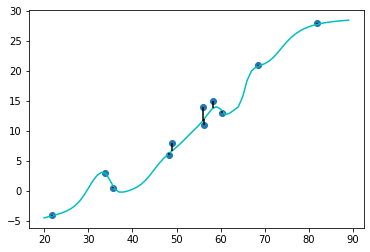

In [28]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_un = 0.1 * t_u

n_hidden_neurons = 50
seq_model = torch.nn.Sequential(OrderedDict([
                ('hidden_linear', torch.nn.Linear(1, n_hidden_neurons)),
                ('hidden_activation', torch.nn.Tanh()),
                ('hidden_linear2', torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)),
                ('hidden_activation2', torch.nn.Tanh()),
                ('output_linear', torch.nn.Linear(n_hidden_neurons, 1)),
                ]))

optimizer = torch.optim.SGD(
    seq_model.parameters(),
    lr=1e-2,
)

training_loop(
    n_epochs=25_000,
    model=seq_model,
    optimizer=optimizer,
    loss_fn=torch.nn.MSELoss(),
    t_u_train=t_un,
    t_c_train=t_c,
)

t_range = torch.arange(20., 90.).unsqueeze(1)

fig, ax = plt.subplots()

ax.plot(t_u, t_c, 'o', label='data')
ax.plot(t_range, seq_model( 0.1 * t_range).detach(), 'c-', label='model predictions')
ax.vlines(t_u, t_c, seq_model(0.1 * t_u).detach(), 'k');

### 6.5.2

In [29]:
import pandas as pd
uri = "https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/tabular-wine/winequality-white.csv"

wineq_numpy = pd.read_csv(uri, delimiter=';')
col_list = list(wineq_numpy.columns)
wineq_numpy = wineq_numpy.to_numpy(dtype='float32')

tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])

In [80]:
wineq_numpy.shape
X = torch.tensor(wineq_numpy[:,:-1])
y = torch.tensor(wineq_numpy[:,-1]).long()

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
n_classes = len(y.unique())

y_onehot = torch.zeros(y.shape[0], 10)
y_onehot.scatter_(1, y.unsqueeze(1), 1.0)  #  in-place

n_features = X.shape[1]

In [87]:
# try with ordinal label encoding
model_wine = torch.nn.Sequential(
    torch.nn.Linear(in_features=n_features, out_features=10),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=10, out_features=10),
)

optimizer = torch.optim.SGD(
    model_wine.parameters(),
    lr=1e-3,
)
import torch

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_c_train, t_u_val = None, t_c_val = None):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        # t_p_val = model(t_u_val)
        # loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")
            # print(f"    gradients: {model.params}")
                #   f" Validation loss {loss_val.item():.4f}")

training_loop(
    n_epochs=10_000,
    model=model_wine,
    optimizer=optimizer,
    loss_fn=torch.nn.CrossEntropyLoss(),
    t_u_train=X,
    t_c_train=y,
)

Epoch 1, Training loss 2.1580
Epoch 1000, Training loss 1.4513
Epoch 2000, Training loss 1.3771
Epoch 3000, Training loss 1.3503
Epoch 4000, Training loss 1.3361
Epoch 5000, Training loss 1.3270
Epoch 6000, Training loss 1.3206
Epoch 7000, Training loss 1.3159
Epoch 8000, Training loss 1.3123
Epoch 9000, Training loss 1.3094
Epoch 10000, Training loss 1.3072
